In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
ad = sc.read_h5ad('../../data/talbot_xenium.h5ad')

In [4]:
spatial = np.array(ad.obs[['x_centroid','y_centroid']])
ad.obsm['spatial'] = spatial

In [8]:
ad.obs

,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,nucleus_count,segmentation_method,run,sample_folder,condition,tissue,genotype,timepoint,seg_method_short,n_genes_by_counts
output-XETG00045__0059976__litt_24h__20250725__091031_aaacaaol-1,368.014587,3811.147461,47,0,0,0,0,0,47.0,55.406721,...,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,20250725__090712__Tuany_mSkinMelanoma5k_run1,0,litt_24h,skin,litt,24h,Boundary (ATP1A1+CD45+E-Cad),42
output-XETG00045__0059976__litt_24h__20250725__091031_aaadhjla-1,389.098480,3823.478516,66,0,0,0,0,0,66.0,80.378128,...,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,20250725__090712__Tuany_mSkinMelanoma5k_run1,0,litt_24h,skin,litt,24h,Boundary (ATP1A1+CD45+E-Cad),60
output-XETG00045__0059976__litt_24h__20250725__091031_aaadjjfj-1,450.419128,3818.730469,96,0,0,0,0,0,96.0,43.891877,...,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,20250725__090712__Tuany_mSkinMelanoma5k_run1,0,litt_24h,skin,litt,24h,Boundary (ATP1A1+CD45+E-Cad),85
output-XETG00045__0059976__litt_24h__20250725__091031_aaajlpkn-1,376.878601,3817.675049,98,0,0,0,0,0,98.0,57.529065,...,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,20250725__090712__Tuany_mSkinMelanoma5k_run1,0,litt_24h,skin,litt,24h,Boundary (ATP1A1+CD45+E-Cad),80
output-XETG00045__0059976__litt_24h__20250725__091031_aaakhclm-1,375.687622,3810.113525,96,0,0,0,0,0,96.0,57.664533,...,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,20250725__090712__Tuany_mSkinMelanoma5k_run1,0,litt_24h,skin,litt,24h,Boundary (ATP1A1+CD45+E-Cad),82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output-XETG00045__0059973__Pdl1_cre__20250725__091031_oilnikpe-1,5521.005859,15156.747070,0,0,0,0,0,0,0.0,8.670000,...,1,Segmented by nucleus expansion of 5.0µm,20250725__090712__Tuany_mSkinMelanoma5k_run1,10,Pdl1_cre,tumor,Pdl1_cre,NaN,Nucleus+5µm,0
output-XETG00045__0059973__Pdl1_cre__20250725__091031_oilnjmld-1,5467.204590,15230.451172,2,0,0,0,0,0,2.0,89.680316,...,1,Segmented by nucleus expansion of 5.0µm,20250725__090712__Tuany_mSkinMelanoma5k_run1,10,Pdl1_cre,tumor,Pdl1_cre,NaN,Nucleus+5µm,2
output-XETG00045__0059973__Pdl1_cre__20250725__091031_oilnklac-1,5463.973145,15224.008789,0,0,0,0,0,0,0.0,47.639845,...,1,Segmented by nucleus expansion of 5.0µm,20250725__090712__Tuany_mSkinMelanoma5k_run1,10,Pdl1_cre,tumor,Pdl1_cre,NaN,Nucleus+5µm,0
output-XETG00045__0059973__Pdl1_cre__20250725__091031_oilnnepc-1,5421.980469,14998.187500,25,0,0,0,0,0,25.0,14.314532,...,1,Segmented by nucleus expansion of 5.0µm,20250725__090712__Tuany_mSkinMelanoma5k_run1,10,Pdl1_cre,tumor,Pdl1_cre,NaN,Nucleus+5µm,25


0


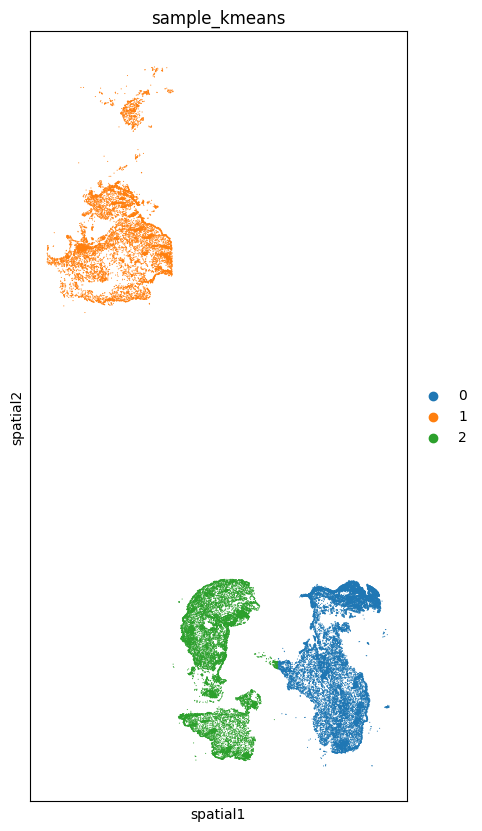

1


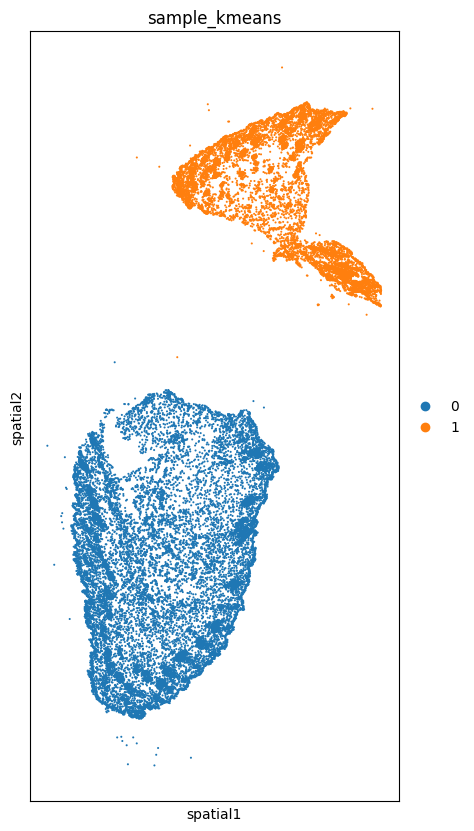

2


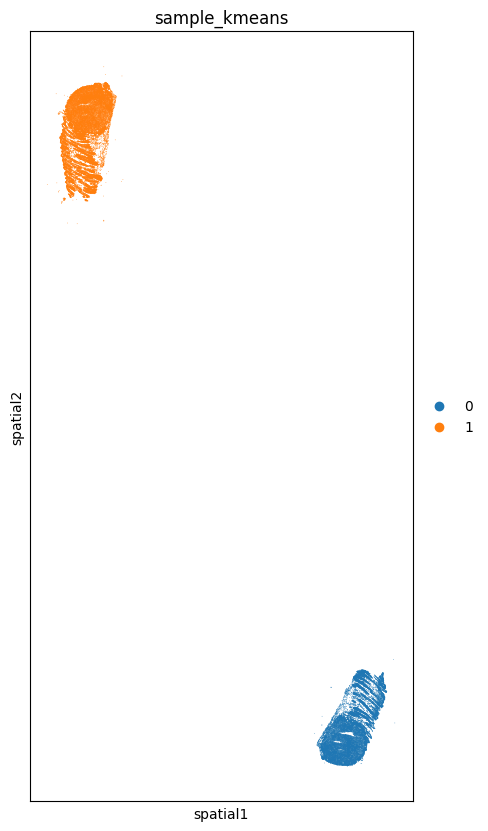

3


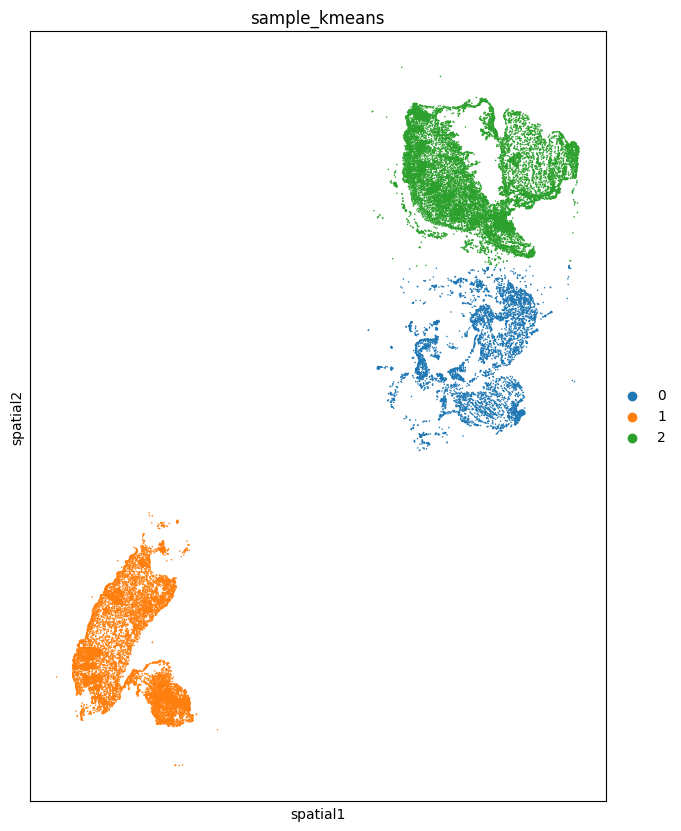

4


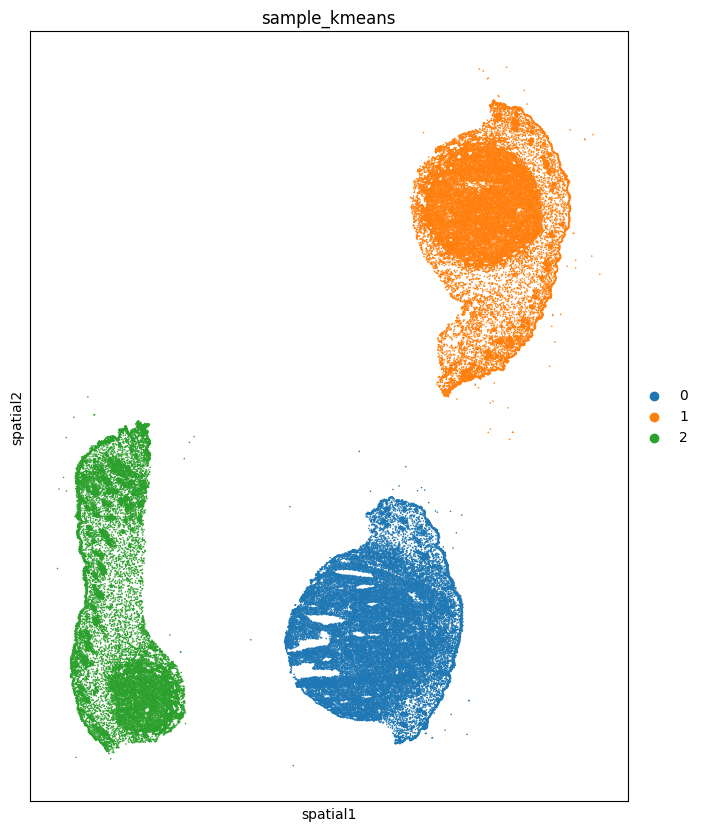

5


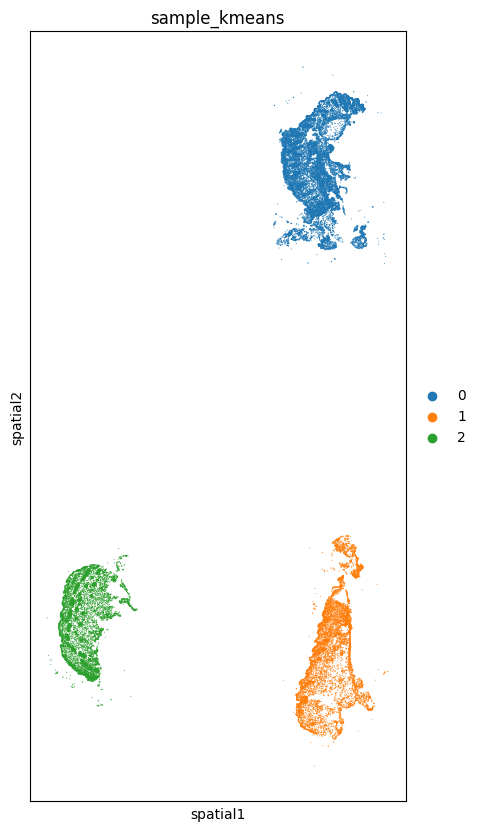

6


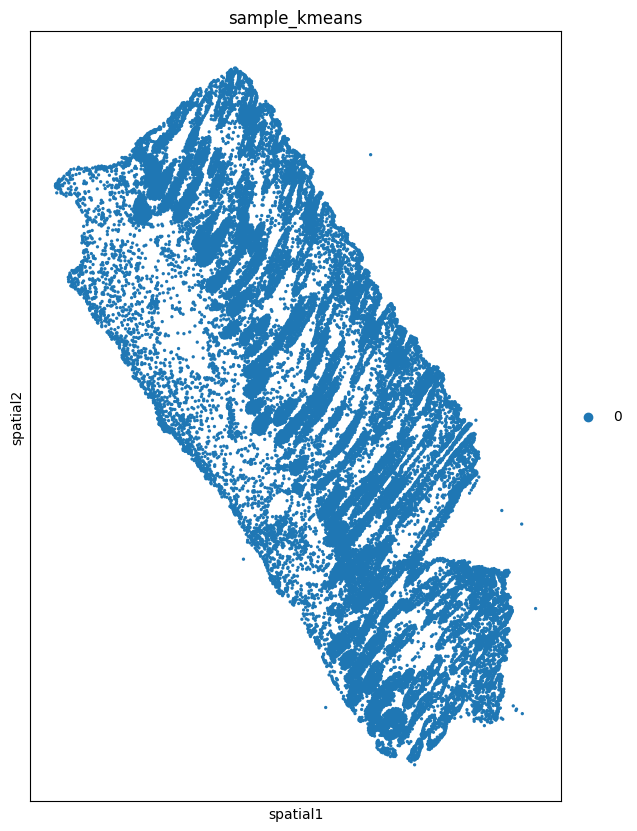

7


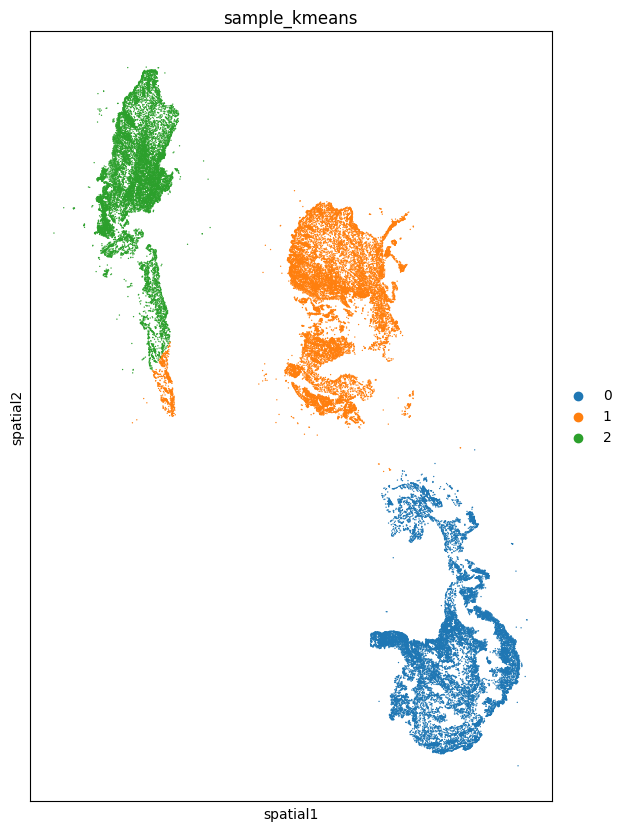

8


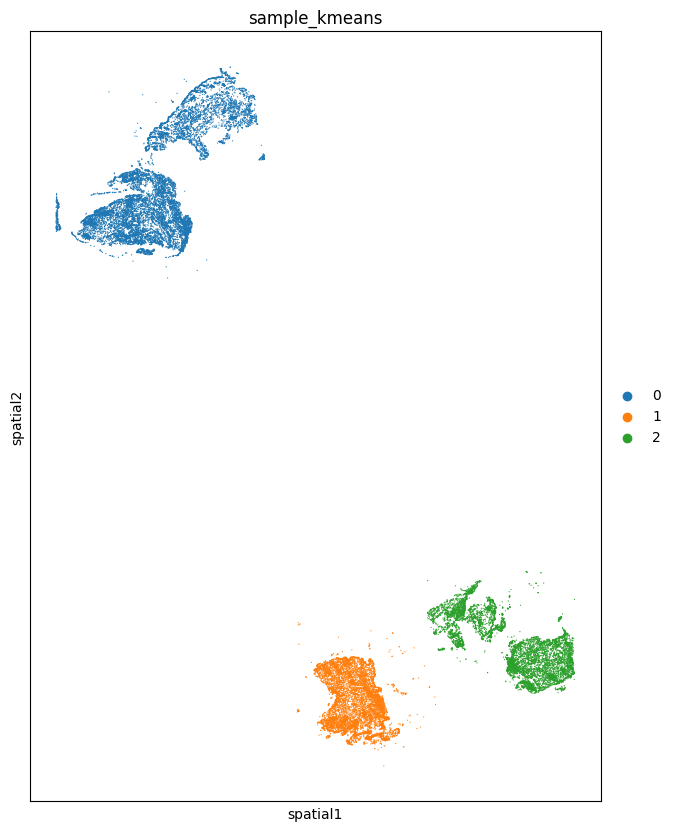

9


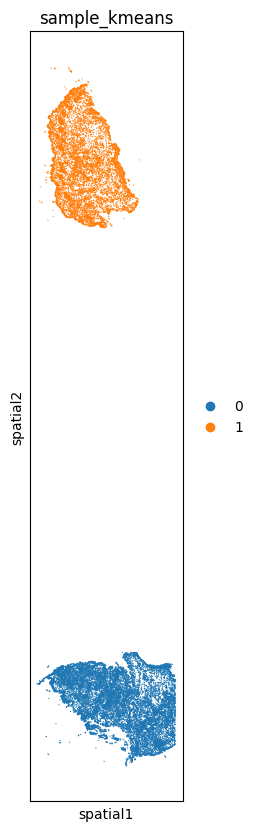

10


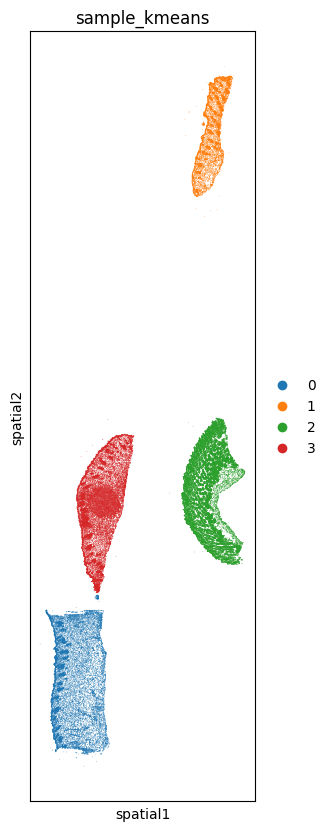

In [13]:
sample_id = []
for grid in ad.obs['sample_folder'].unique():
    print(grid)
    ad_int = ad[ad.obs['sample_folder'] == grid]
    coords = pd.DataFrame(ad_int.obsm["spatial"], columns=["x", "y"])
    if grid=='1' or grid == '2' or grid == '9':
        kmeans = KMeans(n_clusters=2, random_state=0).fit(coords)
    elif grid == '6':
        kmeans = KMeans(n_clusters=1, random_state=0).fit(coords)
    elif grid == '10':
        kmeans = KMeans(n_clusters=4, random_state=0).fit(coords)
    else: 
        kmeans = KMeans(n_clusters=3, random_state=0).fit(coords)
    ad_int.obs["sample_kmeans"] = [f"{i}" for i in kmeans.labels_]
    with plt.rc_context({'figure.figsize': (20, 10)}):
        sc.pl.spatial(ad_int, spot_size=20, color = 'sample_kmeans')
    sample_id.append(ad_int.obs['sample_folder'].astype(str) + '_' + ad_int.obs['sample_kmeans'].astype(str))
    plt.show()
sample_df = pd.concat(sample_id)
ad.obs['sample_id'] = sample_df

In [16]:
ad.write('../../data/talbot_xenium.h5ad')